## **Importar las librerías**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('dark_background')

## **Carga de los datos**

In [3]:
# Accedemos a la ruta del archivo
DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'Breast_Cancer_Wisconsin.csv')

In [4]:
# Cargamos los datos
df_cancer = pd.read_csv(DATA_DIR)

df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## **Inspección y Limpieza de datos**

### **Inspección general del dataset**

In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observación:**
1. Aparentemente todas las columnas a excepción de la última tienen sus valores completos.
2. El dataset cuenta con 569 filas y 33 columnas.
3. La mayoria de columnas son de tipo flotante.

### **Eliminar registros duplicados y columnas irrelevantes**

En el dataset tenemos las columnas **(id, Unnamed: 32)** que para nuestro objetivo no aportan ningún valor de interés.

Por ello, vamos a eliminarlos usando la función `drop()` de pandas.

In [6]:
df_cancer = df_cancer.drop(['Unnamed: 32', 'id'], axis=1)

A todo conjunto de datos es recomendable eliminar sus registros duplicados ya que pueden ocasionar problemas de redundancia, overfitting y crear un modelo sesgado con aparentemente buena predicción.

Por eso, tendremos que eliminarlos usando la función `drop_duplicated()` de pandas.

In [7]:
df_cancer = df_cancer.drop_duplicates()

### **Proporción de la variable objetivo**

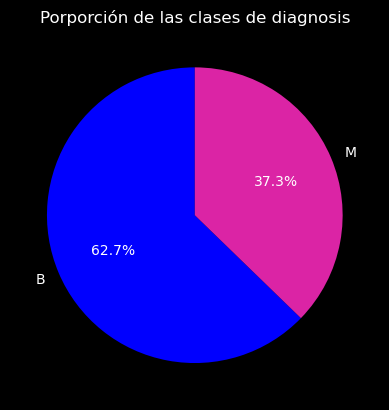

In [8]:
(
    df_cancer['diagnosis']
    .value_counts()
    .pipe(
        lambda df: (
            plt.pie(
                df,
                labels=df.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=['blue', '#db24a5']
            ),
        )
    )
)
plt.title('Porporción de las clases de diagnosis')
plt.show()

## **Análisis Exploratorio de Datos**

### **Valores faltantes**

In [9]:
# Conocer la cantidad de valores nulos de cada columna
df_cancer.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

El dataset aparentemente no tiene valores nulos y esto a priori puede paracer algo bueno, aunque hay que recordar que podemos tener valores nulos codificados o valores fuera del rango esperado de una variable.

### **Descripción estadística**

Dado que el dataset es todo numérico _(excluyendo la variable objetivo **diagnosis**)_ lo que mejor podemos hacer es un análisis descriptivo estadístico usando la función `.describe()` de pandas.

In [10]:
data_des = df_cancer.describe()
data_des

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Observaciones:**
- Algunas variables tienen una diferencia entre medias $(\mu)$ y el cuartil 2 $(Q_2)$ muy cercanas por lo que podría haber distribuciones casi simétricas o con poca varianza entre los datos.
- No hay variables con desviación estándar $(\sigma = 0)$ pero algunas variables si que están muy cerca de este valor y esto es debido al rango de valores que maneja cada variable.
- La mayoria de variables tienen un valor $\min$ cercano al $Q_1$, el cual representa el $25\%$ de los datos, dando a entender que la distribución esta sesgada hacia la izquierda o hacia la parte negativa en una distribución normal.
- Algunas variables tiene un valor $\max$ alejado del $Q_3$, el cual representa el $75\%$ de los datos, dando así la posibilidad de valores outliers.

### **Visualizando valores atípicos**

Cuando queremos entrenar un modelo de clasificación tendremos que trabajar con datos que tengan una distribución casi simétrica, ya que los valores atípicos pueden afectar al rendimiento del modelo.

Entonces, lo mejor sería comenzar con una exploración de cada variable para ver sus distribuciones.

In [11]:
def optimizer_bins(column):
    """Encontrar el ancho de banda óptimo mediante la regla de Freedman-Diaconis."""

    # Calcular el rango intercuartílico
    IQR = column.quantile(0.75) - column.quantile(0.25)
    N = len(column)

    # Calcular el ancho de banda óptimo
    h = 2 * IQR / (N ** (1/3))

    return h

In [12]:
def plot_distribution(X, y, hue, column, ax):
    sns.histplot(
        x = X,
        hue = y if hue == True else None,
        kde = True,
        color='#0e7075' if hue == None else None,
        palette=['blue', '#db24a5'] if hue == True else None,
        binwidth=optimizer_bins(X),
        ax=ax
    )
    ax.set_title(f'Distribución de la variable {column}')

In [13]:
def plot_box(X, y, hue, column, ax):
    sns.boxplot(
        x = X,
        hue = y if hue == True else None,
        orient='h',
        color='#0e7075' if hue == None else None,
        linewidth=2,
        ax=ax,
        palette=['blue', '#db24a5'] if hue == True else None
    )
    ax.set_title(f'Boxplot de la variable {column}')

In [ ]:
def visualization_distribution(X, y, graf='hist', hue=None):
    rows = 10
    cols = 3
    fig, axs = plt.subplots(rows, cols, figsize=(15, 30))
    fig.tight_layout(pad=3.0)
    
    for i, column in enumerate(X.columns):
        row = i // cols
        col = i % cols
        if graf == 'hist':
            plot_distribution(
                X.iloc[:,i], y, 
                hue, 
                column, 
                axs[row, col]
            )
        elif graf == 'box':
            plot_box(
                X.iloc[:,i], y,
                hue, 
                column, 
                axs[row, col]
            )
    
    # Eliminar subplots vacíos
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs[j // cols, j % cols])
    
    plt.show()

In [15]:
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']

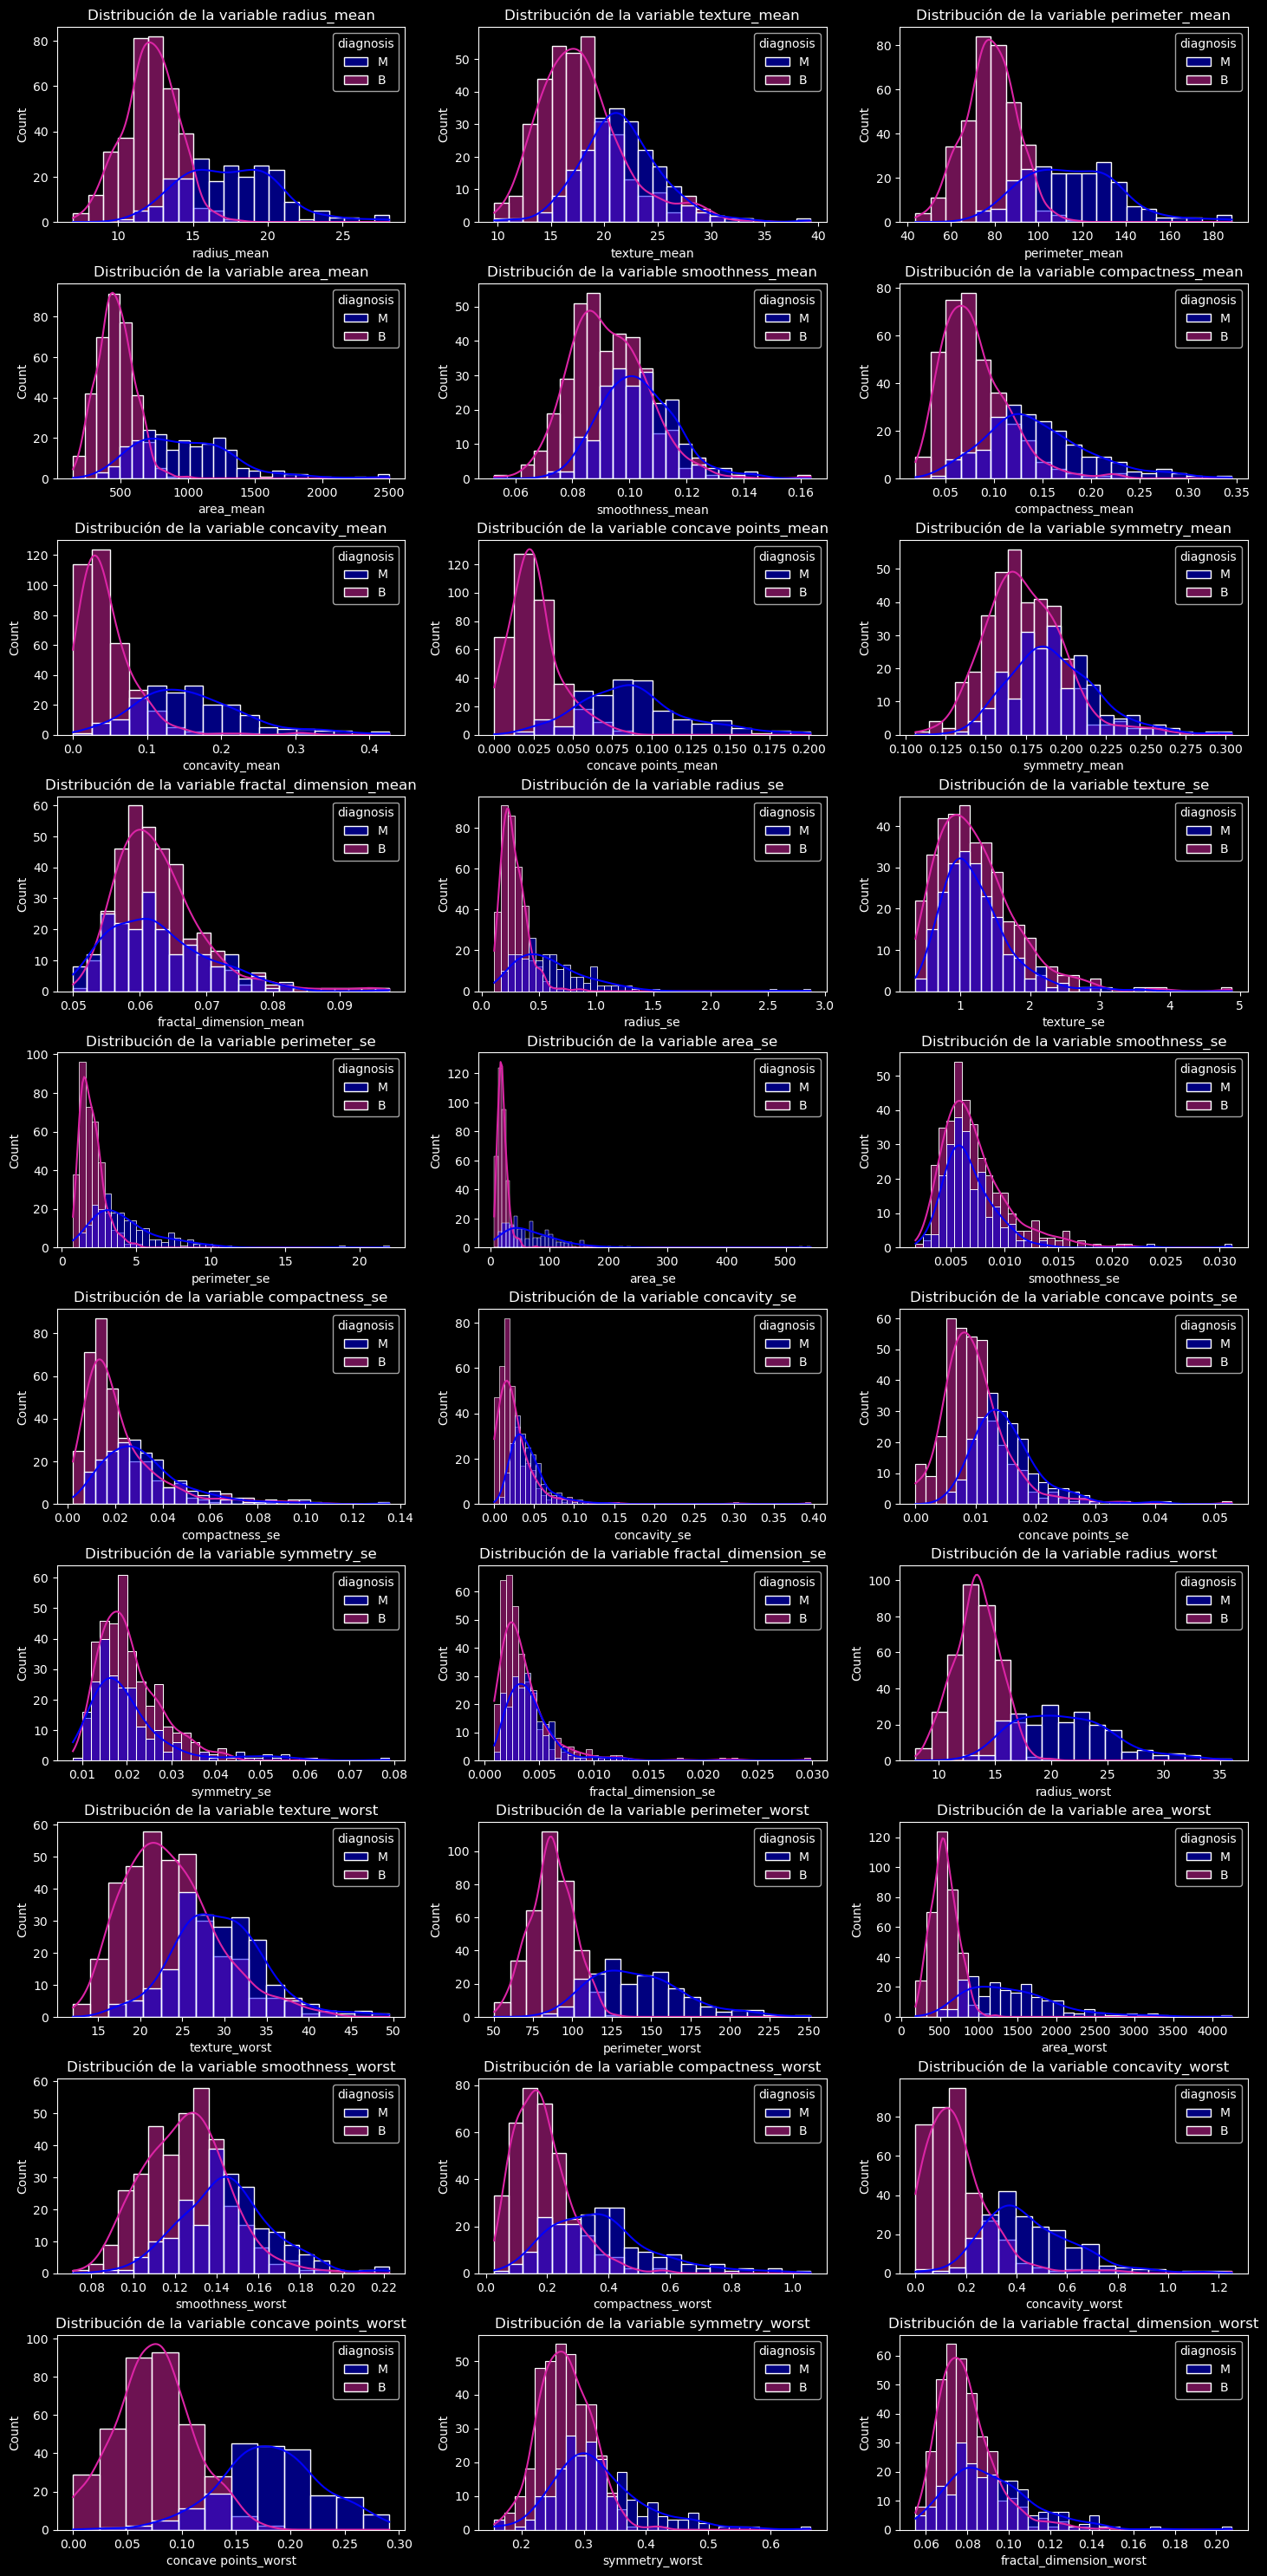

In [16]:
visualization_distribution(X, y, graf='hist', hue=True)

**Observación:**
- El sesgo de las variables hace que si queremos entrenar un modelo de regresión logística tengamos que tratar de normalizar o entandarizar dichas variables para que esten un poco más simétricas en cuanto a su distribución de datos.

El siguiente paso es ver que tantos valores atípicos están fuera del $95\%$ de la captura de los datos.

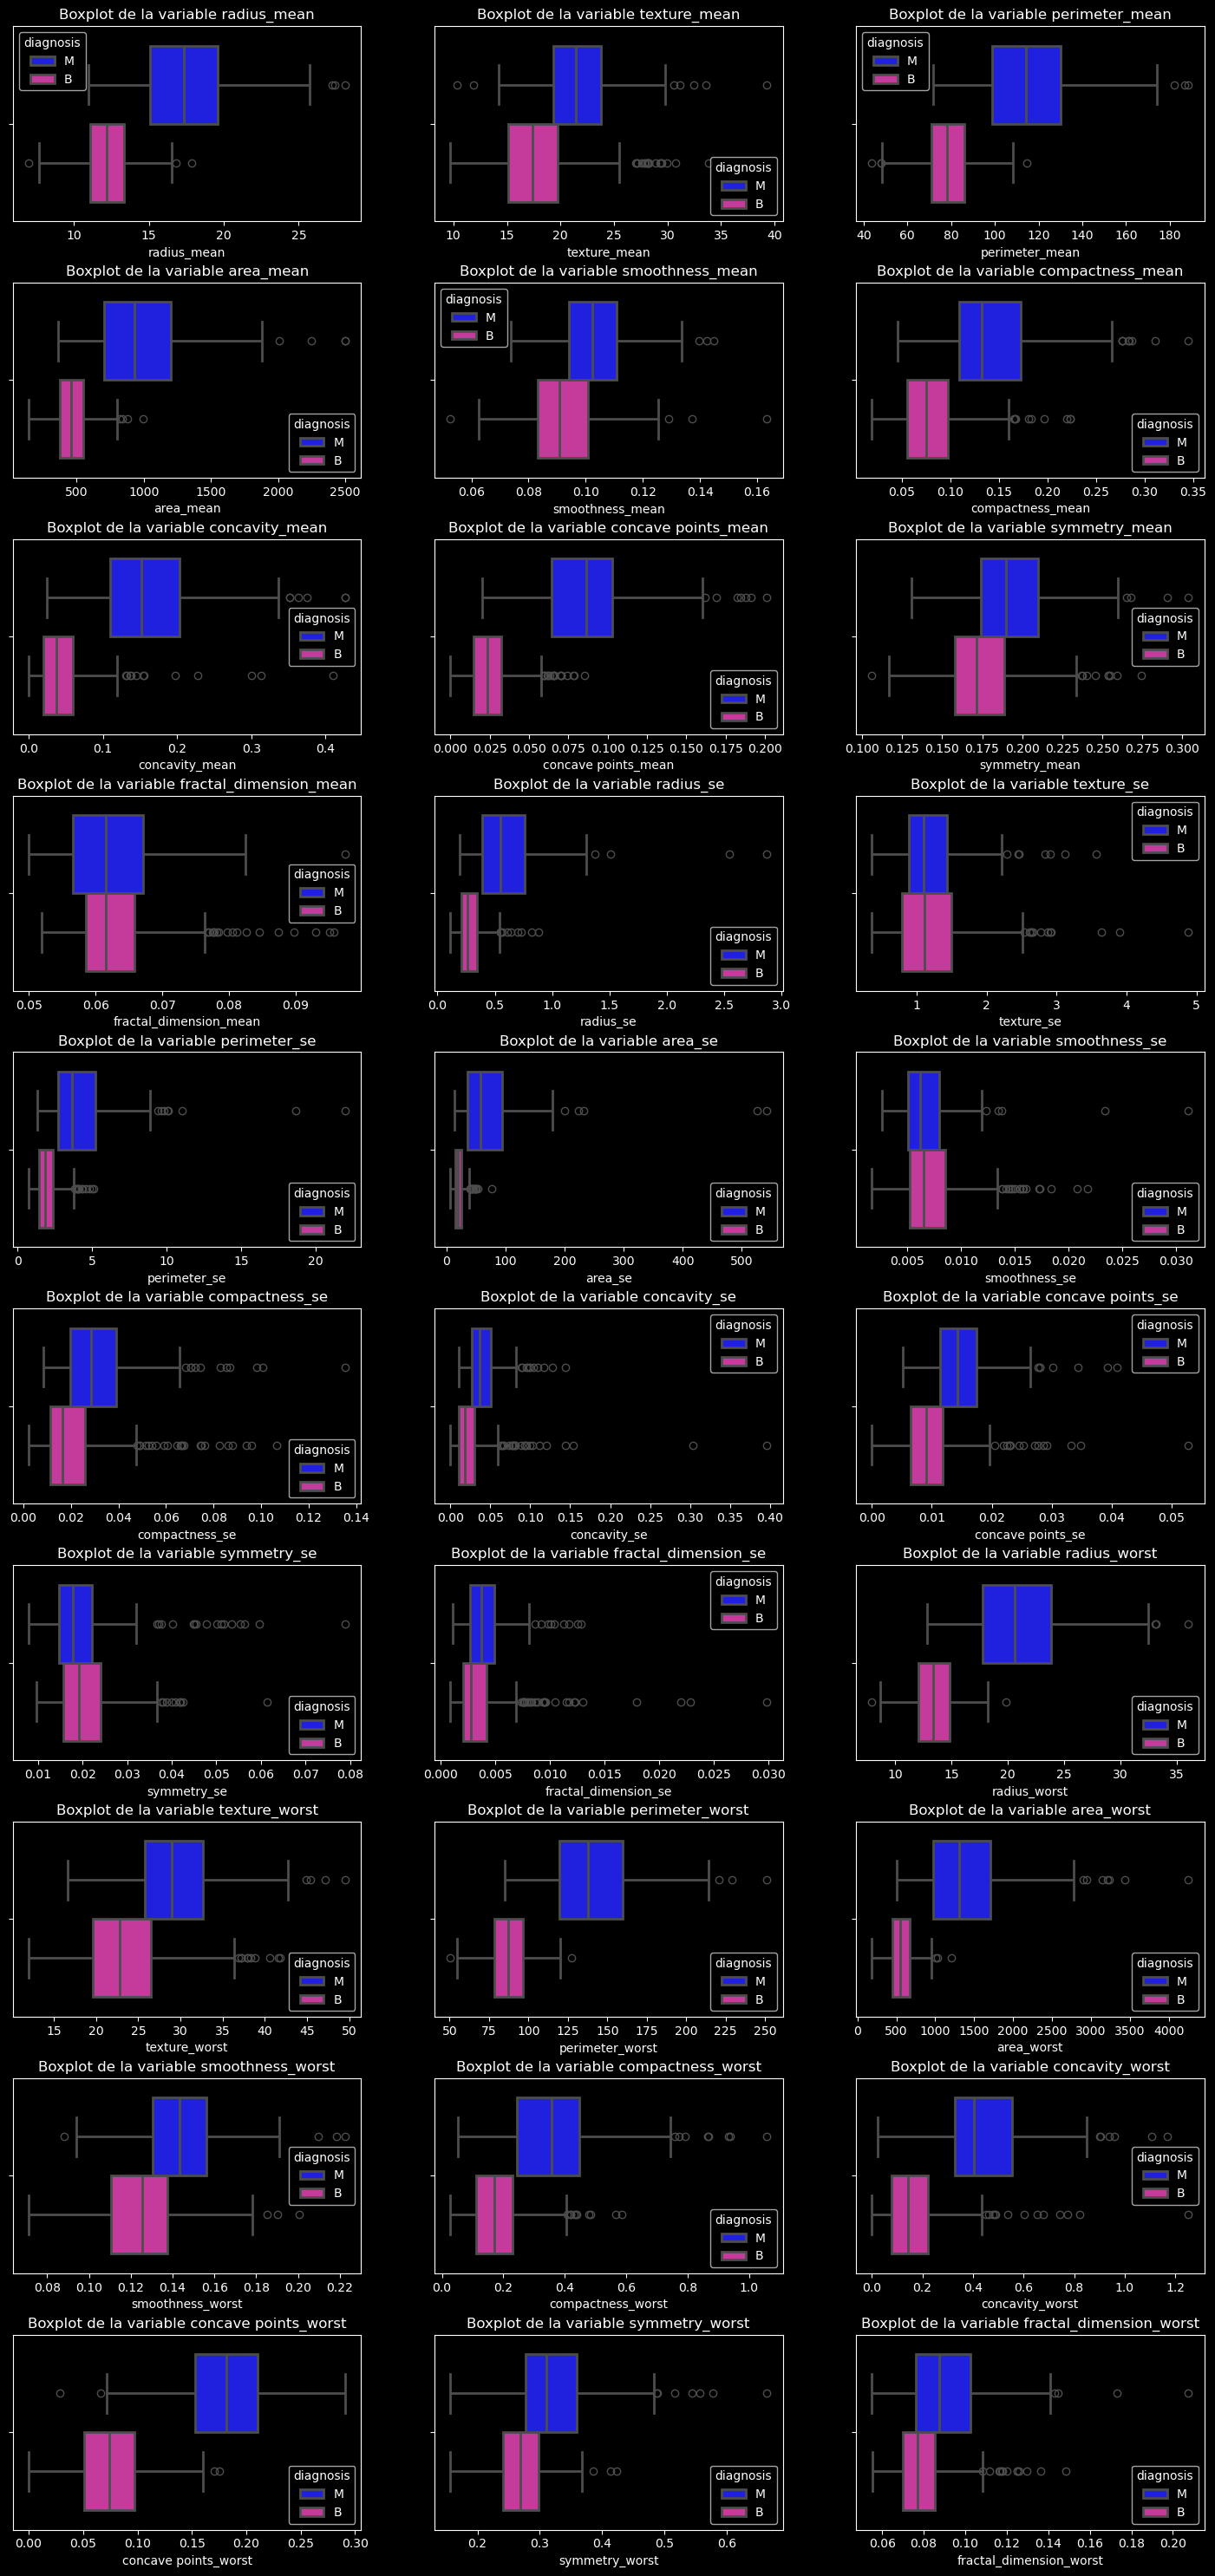

In [17]:
visualization_distribution(X, y, graf='box', hue=True)

Para profundizar en estos valores atípicos vamos a contabilizarlos para cada variable y también a conocer su proporción respectiva.

In [18]:
def accounting_outliers(df, variables):
    """Contabilizar los valores atípicos de cada variable."""
    table_outliers = {}

    for column in variables:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        size = len(outliers)
        percentage = size / len(df) * 100
        table_outliers[column] = [size, percentage]

    return pd.DataFrame(table_outliers, index=['n_outliers', 'percentage']).T

In [19]:
accounting_outliers(df_cancer, X.columns).sort_values(by='percentage', ascending=False)

,n_outliers,percentage
area_se,65.0,11.423550
radius_se,38.0,6.678383
perimeter_se,38.0,6.678383
area_worst,35.0,6.151142
smoothness_se,30.0,5.272408
compactness_se,28.0,4.920914
fractal_dimension_se,28.0,4.920914
symmetry_se,27.0,4.745167
area_mean,25.0,4.393673
fractal_dimension_worst,24.0,4.217926


In [20]:
(
    df_cancer
    .groupby(['diagnosis'])
    .apply(
        lambda x: accounting_outliers(x, X.columns)
    )
    .sort_values(by=['diagnosis', 'percentage'], ascending=False)
)

C:\Users\modos\AppData\Local\Temp\ipykernel_11164\295050327.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


n_outliers  percentage
diagnosis                                                
M         symmetry_se                    16.0    7.547170
          compactness_se                 11.0    5.188679
          concavity_se                   10.0    4.716981
          fractal_dimension_se            9.0    4.245283
          compactness_mean                8.0    3.773585
          perimeter_se                    8.0    3.773585
          compactness_worst               8.0    3.773585
          texture_mean                    7.0    3.301887
          concave points_mean             7.0    3.301887
          texture_se                      7.0    3.301887
          concave points_se               7.0    3.301887
          area_worst                      7.0    3.301887
          symmetry_worst                  7.0    3.301887
          concavity_mean                  6.0    2.830189
          concavity_worst                 6.0    2.830189
          area_se                         5.0    2.358491
          smoothness_se                   5.0    2.358491
          area_mean                       4.0    1.886792
          symmetry_mean                   4.0    1.886792
          radius_se                       4.0    1.886792
          texture_worst                   4.0    1.886792
          smoothness_worst                4.0    1.886792
          fractal_dimension_worst         4.0    1.886792
          radius_mean                     3.0    1.415094
          perimeter_mean                  3.0    1.415094
          smoothness_mean                 3.0    1.415094
          radius_worst                    3.0    1.415094
          perimeter_worst                 3.0    1.415094
          concave points_worst            2.0    0.943396
          fractal_dimension_mean          1.0    0.471698
B         fractal_dimension_se           26.0    7.282913
          compactness_se                 23.0    6.442577
          concavity_se                   22.0    6.162465
          texture_mean                   18.0    5.042017
          concave points_mean            17.0    4.761905
          fractal_dimension_mean         17.0    4.761905
          smoothness_se                  17.0    4.761905
          area_se                        15.0    4.201681
          concave points_se              15.0    4.201681
          concavity_worst                13.0    3.641457
          fractal_dimension_worst        13.0    3.641457
          concavity_mean                 12.0    3.361345
          texture_se                     12.0    3.361345
          perimeter_se                   12.0    3.361345
          symmetry_mean                  10.0    2.801120
          symmetry_se                    10.0    2.801120
          texture_worst                  10.0    2.801120
          compactness_worst              10.0    2.801120
          compactness_mean                9.0    2.521008
          radius_se                       9.0    2.521008
          perimeter_mean                  4.0    1.120448
          area_mean                       4.0    1.120448
          smoothness_mean                 4.0    1.120448
          radius_mean                     3.0    0.840336
          area_worst                      3.0    0.840336
          smoothness_worst                3.0    0.840336
          symmetry_worst                  3.0    0.840336
          radius_worst                    2.0    0.560224
          perimeter_worst                 2.0    0.560224
          concave points_worst            2.0    0.560224

### **Matriz de correlación**

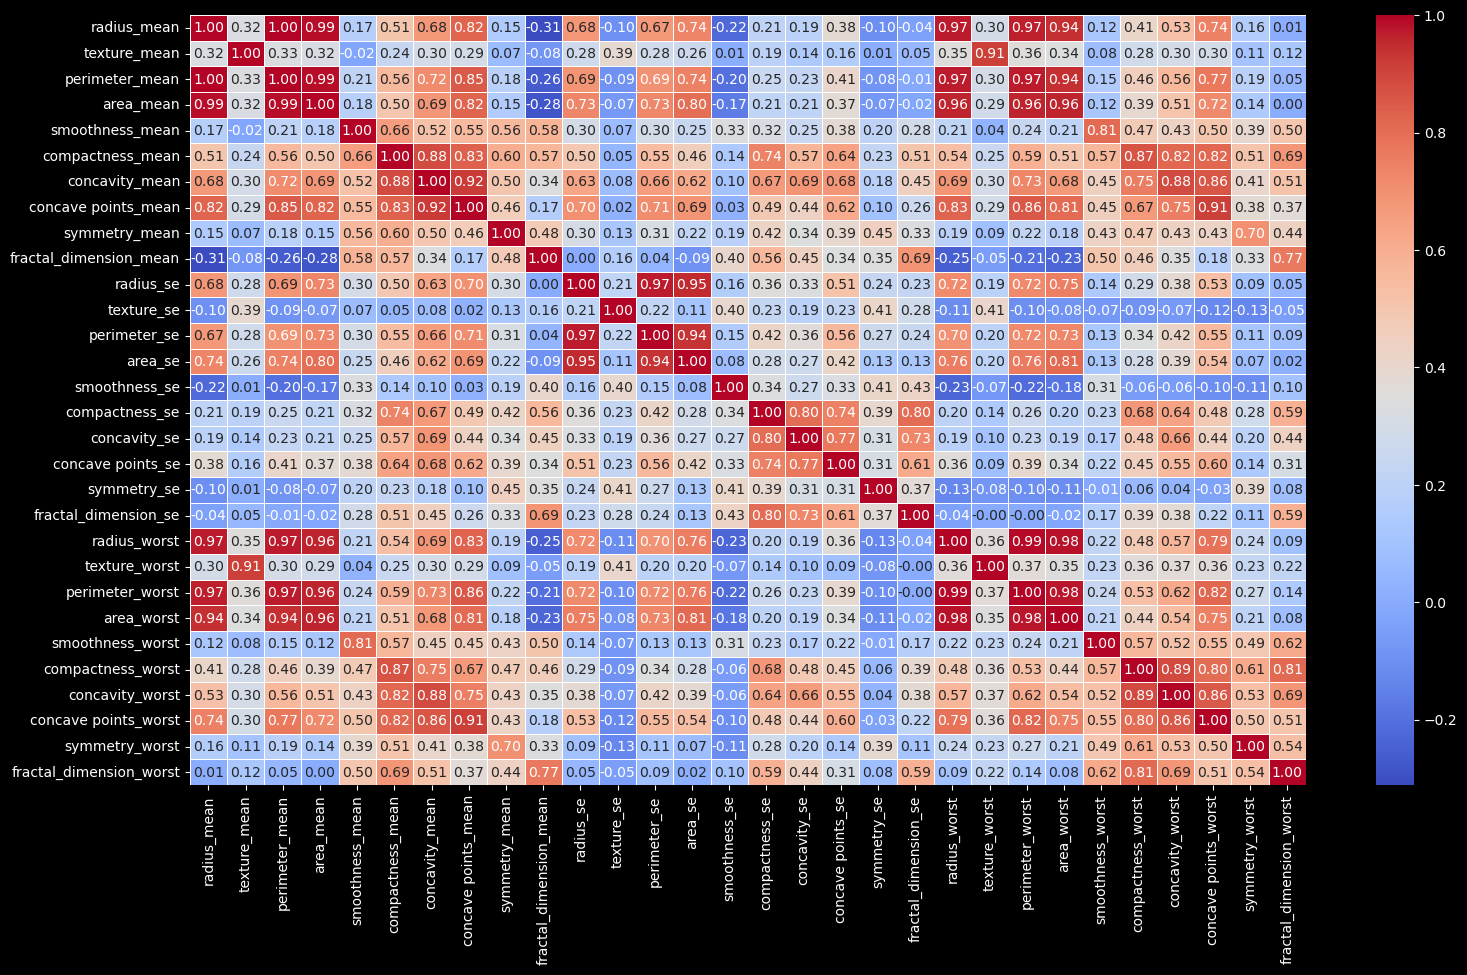

In [21]:
m_correlation = df_cancer.corr(numeric_only=True)

plt.figure(figsize=(18, 10))
sns.heatmap(
    data=m_correlation,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
);

**Observación:**
- Existen múltiples variables que están correlacionadas entre sí, siendo esto un problema de multicolinealidad para el modelo que queramos entrenar.

## **Codificar la variable objetivo**

In [22]:
df_cancer.diagnosis = df_cancer.diagnosis.map({'M': 1, 'B': 0})

In [23]:
df_cancer.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## **Análisis de correlacion con respecto a la variable objetivo**

In [24]:
cancer_processed = df_cancer.copy(deep=True)

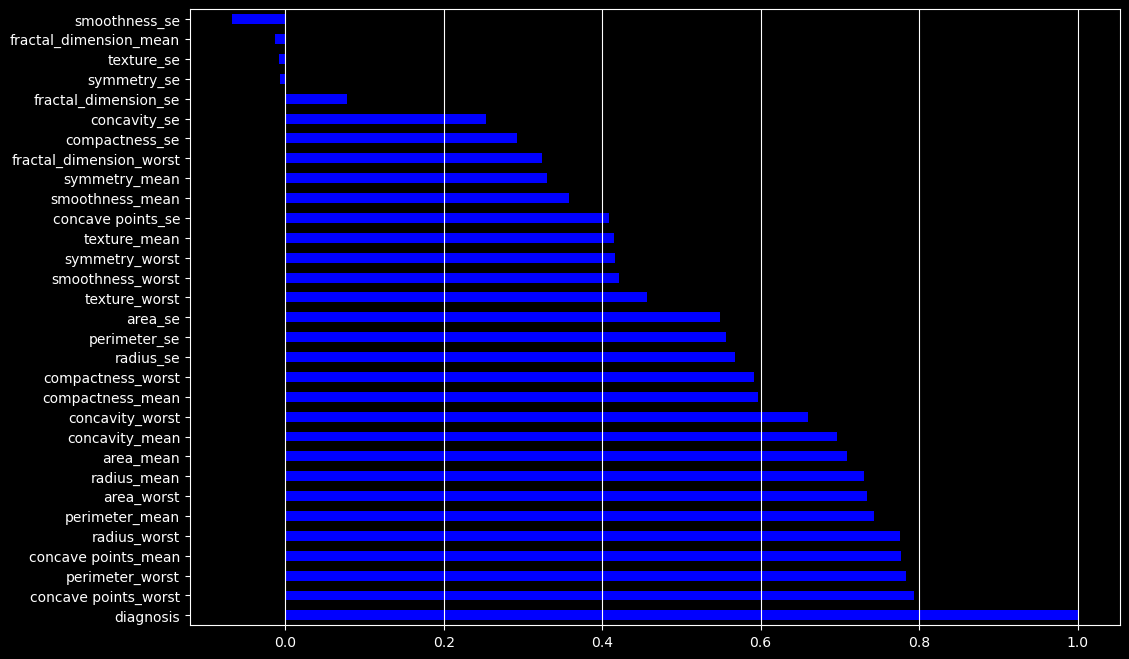

In [25]:
cancer_processed.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 8), color='blue')
plt.grid(axis='x');

## **Dividiendo los datos en entrenamiento y prueba**

In [26]:
X = cancer_processed.drop('diagnosis', axis=1)
y = cancer_processed['diagnosis']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## **Escalamiento de los datos**

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# scaler = StandardScaler()
scaler = RobustScaler()

x_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

## **Creación del modelo**

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42)

In [31]:
LR.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [32]:
y_pred_train = LR.predict(x_train_scaled)
y_pred_test = LR.predict(x_test_scaled)

### Evaluar la precisión del modelo

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, pre, rec, f1

acc_train, pre_train, rec_train, f1_train = metrics(y_train, y_pred_train)
acc_test, pre_test, rec_test, f1_test = metrics(y_test, y_pred_test)

Accuracy Train: 0.99
Precision Train: 1.00
Recall Train: 0.97
F1 Train: 0.99

Accuracy Test: 0.98
Precision Test: 1.00
Recall Test: 0.95
F1 Test: 0.98



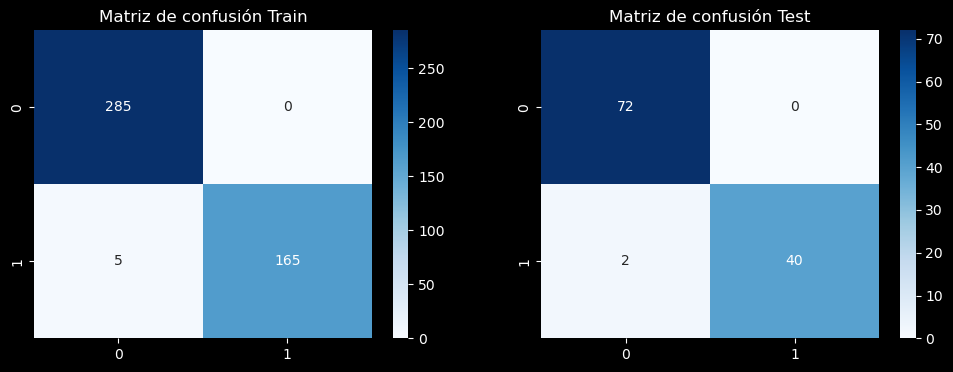

In [34]:
print(
    f'Accuracy Train: {acc_train:.2f}\n'
    f'Precision Train: {pre_train:.2f}\n'
    f'Recall Train: {rec_train:.2f}\n'
    f'F1 Train: {f1_train:.2f}\n'
)

print(
    f'Accuracy Test: {acc_test:.2f}\n'
    f'Precision Test: {pre_test:.2f}\n'
    f'Recall Test: {rec_test:.2f}\n'
    f'F1 Test: {f1_test:.2f}\n'
)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(
    data=cm_train,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axs[0]
)
axs[0].set_title('Matriz de confusión Train')

sns.heatmap(
    data=cm_test,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axs[1]
)
axs[1].set_title('Matriz de confusión Test')

plt.show()

**Conclusiones:**
1. Tras el análisis del conjunto de datos, comprobamos que está desbalanceado por lo que en la parte de la evaluación, nos centramos en la métrica **f1_score** en lugar de la precisión.

2. Cuando visualizamos las distribuciones de las variables numéricas y segmentandolas por la variable **diagnosis** vimos que para los registros con clase **B (Benigno)** suelen tener más distribuciones asimétricas a comparación de los registros **M (Maligno)**.

3. Después de realizar los gráficos de caja para visualizar los valores atípicos, realizamos un conteo y ordenamiento de las variables que tenian más outliers y vimos que un primer momento la variable con el conteo más alto fue **area_mean**. Sin embargo, luego hicimos la segmentación de los registros por su respectiva clase y volviendo a calcular los outliers, y ahora según cada clase las variables con más outliers son **symmetry_se** y **fractal_dimension_se**.

4. Dado la presencia de outliers se decidio hacer un escalamiento aplicando **RobustScaler** ya que si lo haciamos con **StandardScaler** este no iba a ser una buena opción dado que este escalamiento es más para variables con una buena simetria en sus distribuciones.

5. El modelamiento resulto bastante bueno ya que las métricas utilizadas nos dejan ver un valor de **F1 score** de $99\%$ para el entrenamiento y el $98\%$ para prueba.